In [1]:
!pip install factor-analyzer

In [2]:
from google.colab import drive
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Esp_data_science/Proyecto/datasetEstudio-2021-2024.csv'
file_path_scale = '/content/drive/My Drive/Esp_data_science/Proyecto/datasetEstudio-2021-2024Escalados.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datasetEstudio_2021_2024 = pd.read_csv(file_path)
datasetEstudio_2021_2024.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,88,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2023,6,9,Suroriental,129,14.9075,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.80,1.7,145.0,183.0,comuna 14
1,89,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2024,5,7,Suroriental,142,15.2972,1,Media semana,...,1,1.0,1,1.0,1.0,0.38,0.7,187.0,204.0,comuna 14
2,64,NEUMOMED S.A.S.,2021,11,5,Suroriental,46,9.7798,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.88,1.8,96.5,116.5,comuna 14
3,87,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2023,22,4,Suroriental,144,12.2535,1,Fin de Semana,...,1,1.0,1,1.0,1.0,0.70,1.4,176.0,203.0,comuna 14
4,0,Corporación Hospital Infantil Concejo de Medellín,2024,18,8,Nororiental,21,13.3418,1,Fin de Semana,...,1,1.0,1,1.0,1.0,1.50,2.9,66.0,66.0,comuna 4


In [4]:
datasetEstudio_2021_2024_scale = pd.read_csv(file_path_scale)
datasetEstudio_2021_2024_scale.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.733333,0.397436,0.666667,0.166667,0.727273,1.0,0.299065,0.205138,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.207921,0.263158,0.373333,0.500888,0.0
1,0.741667,0.397436,1.000000,0.133333,0.545455,1.0,0.329439,0.215515,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.513333,0.575488,0.0
2,0.533333,0.756410,0.000000,0.333333,0.363636,1.0,0.105140,0.068606,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.247525,0.289474,0.211667,0.264654,0.0
3,0.725000,0.397436,0.666667,0.700000,0.272727,1.0,0.334112,0.134472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.158416,0.184211,0.476667,0.571936,0.0
4,0.000000,0.358974,1.000000,0.566667,0.636364,0.0,0.046729,0.163449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.554455,0.578947,0.110000,0.085258,1.0


In [5]:
datasetEstudio_2021_2024_scale.columns

Index(['edad', 'NombreIPS', 'anio', 'dia', 'mes', 'sector_ips',
       'atenciones_por_dia', 'pm25', 'calidad_pm25', 'dia_semana', 'estacion',
       'festivo', 'temperatura', 'humedad', 'presion', 'p1', 'calidad_humedad',
       'calidad_temperatura', 'calidad_presion', 'calidad_precipitacion',
       'calidad_vientos', 'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'comuna'],
      dtype='object')

In [6]:
# Seleccionemos las columnas de interes
selected_columns = [col for col in datasetEstudio_2021_2024_scale.columns if 'calidad' not in col]
datasetEstudio_2021_2024_scale = datasetEstudio_2021_2024_scale[selected_columns]
datasetEstudio_2021_2024_scale.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,dia_semana,estacion,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.733333,0.397436,0.666667,0.166667,0.727273,1.0,0.299065,0.205138,0.5,1.0,0.0,0.917623,0.143971,0.697987,0.000000,0.207921,0.263158,0.373333,0.500888,0.0
1,0.741667,0.397436,1.000000,0.133333,0.545455,1.0,0.329439,0.215515,1.0,1.0,0.0,0.479666,0.624098,0.804027,0.012605,0.000000,0.000000,0.513333,0.575488,0.0
2,0.533333,0.756410,0.000000,0.333333,0.363636,1.0,0.105140,0.068606,0.5,1.0,0.0,0.677789,0.428255,0.630874,0.000000,0.247525,0.289474,0.211667,0.264654,0.0
3,0.725000,0.397436,0.666667,0.700000,0.272727,1.0,0.334112,0.134472,0.0,1.0,0.0,0.458811,0.664229,0.664430,0.008403,0.158416,0.184211,0.476667,0.571936,0.0
4,0.000000,0.358974,1.000000,0.566667,0.636364,0.0,0.046729,0.163449,0.0,0.0,0.0,0.688217,0.341642,0.879195,0.000000,0.554455,0.578947,0.110000,0.085258,1.0


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KMO general: 0.5849941503063995


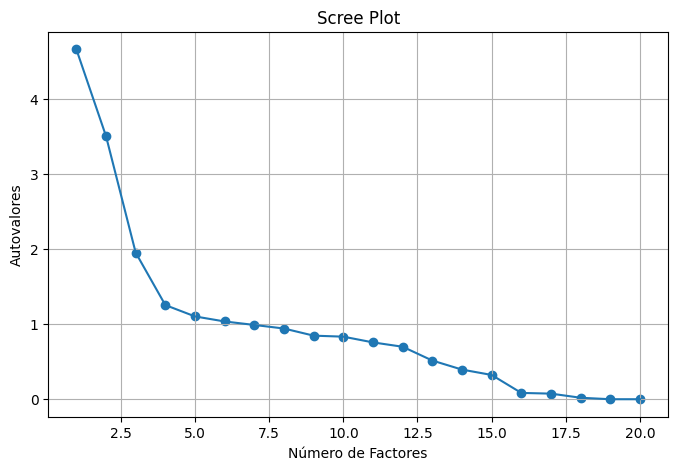

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                           0         1         2         3         4         5
edad                0.040128  0.005807  0.059462  0.063033  0.136178  0.008460
NombreIPS           0.173653  0.003398  0.124160 -0.039292  0.123313  0.089688
anio               -0.095016  0.111670 -0.155384 -0.094137 -0.474519  0.375024
dia                 0.018277 -0.013140 -0.009152 -0.007813  0.007801  0.143641
mes                -0.033268 -0.107282 -0.007924  0.007222  0.028671 -0.527897
sector_ips         -0.960250 -0.157520 -0.156519 -0.077660 -0.131895 -0.019719
atenciones_por_dia -0.072211  0.150489 -0.038197  0.631595  0.232413 -0.035078
pm25               -0.012656 -0.047770  0.083807 -0.265538 -0.007388  0.338619
dia_semana         -0.063881  0.038052  0.083275 -0.124943  0.058862  0.057955
estacion           -0.960250 -0.157520 -0.156519 -0.077660 -0.131895 -0.019719
festivo             0.016569 -0.016687  0.018297  0.118196  0.000245 -0.042440
temperatura        -0.403620  0.478813 -0.189744  0.

In [7]:
df = datasetEstudio_2021_2024_scale.copy()

# Evaluar la idoneidad del dataset con la prueba de Kaiser-Meyer-Olkin (KMO)
kmo_all, kmo_model = calculate_kmo(df)

print(f"KMO general: {kmo_model}")  # Debe ser > 0.6 para un buen análisis factorial

# Determinar el número óptimo de factores con Scree Plot
fa = FactorAnalyzer(n_factors=df.shape[1], rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(8,5))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.xlabel('Número de Factores')
plt.ylabel('Autovalores')
plt.title('Scree Plot')
plt.grid()
plt.show()

# Definir el número de factores basado en el criterio de Kaiser (autovalores > 1)
n_factors = sum(ev > 1)

# Realizar Análisis de Factores con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(df)

# Cargar los factores
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns)
print(factor_loadings)

1. KMO General: 0.5849

  El índice KMO mide si los datos son adecuados para el análisis factorial.

  Valores aceptables:\
  < 0.5: No es recomendable realizar FA.\
  0.5 - 0.7: Aceptable, pero podría mejorar.\
  0.7 o arriba: Bueno.

  Conclusión: 0.58 está en el límite, lo que indica que el FA es posible pero con reservas. Si quieres mejorar, podrías eliminar variables con bajas correlaciones.

2. Scree Plot (Gráfico de Sedimentación)\
Se usa para determinar cuántos factores considerar.\
Observamos que los autovalores disminuyen rápidamente hasta el factor 3-4, lo que sugiere que entre 4 y 5 factores explican la mayor parte de la variabilidad.\
Criterio de Kaiser: Tomamos factores con autovalores > 1, lo que aquí indica aproximadamente 5 factores.

3. Matriz de Cargas Factoriales\
Cada valor representa cuánto contribuye una variable a un factor específico.\
Valores cercanos a 1 o -1 significan que la variable está fuertemente asociada con ese factor.\
Valores < 0.4 indican baja asociación con el factor.

Variables altamente correlacionadas: [('sector_ips', 'estacion'), ('sector_ips', 'comuna'), ('estacion', 'sector_ips'), ('estacion', 'comuna'), ('velocidad_prom', 'velocidad_max'), ('velocidad_max', 'velocidad_prom'), ('comuna', 'sector_ips'), ('comuna', 'estacion')]


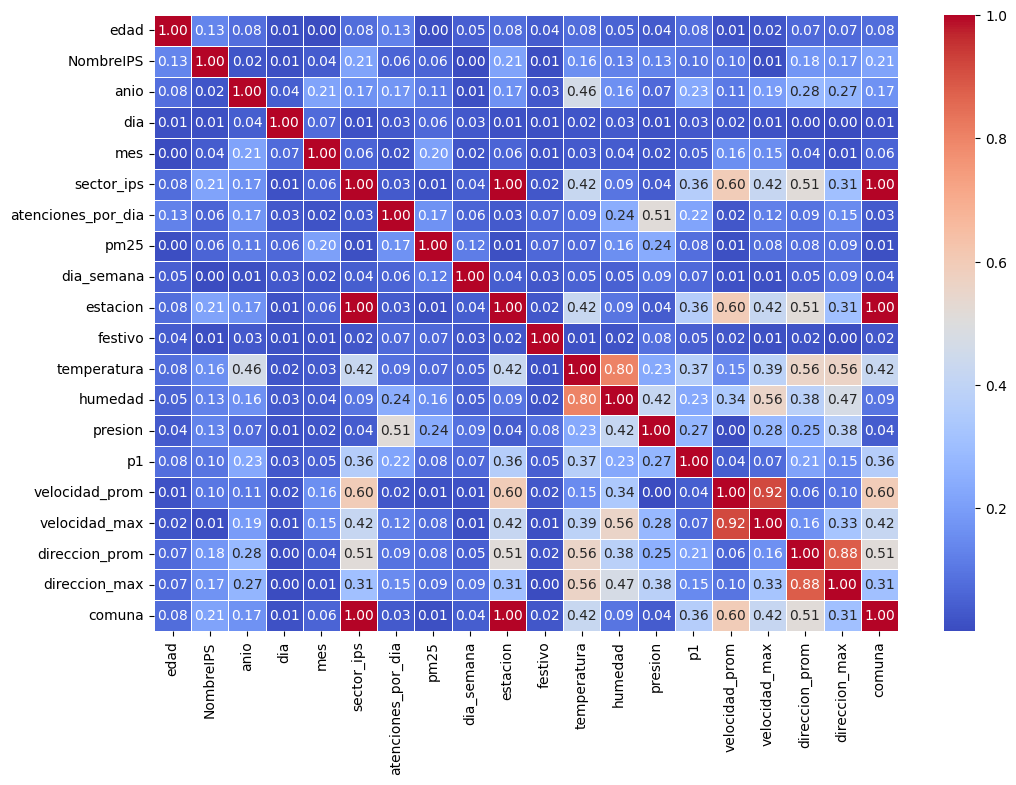

In [8]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Encontrar pares de variables con alta correlación
high_corr_vars = np.where(corr_matrix > 0.9)
high_corr_vars = [(df.columns[i], df.columns[j]) for i, j in zip(*high_corr_vars) if i != j]
print("Variables altamente correlacionadas:", high_corr_vars)


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KMO general: 0.5971030593872119


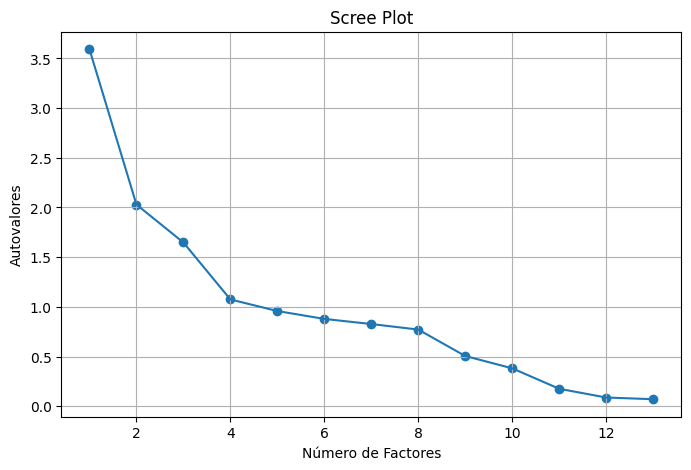

Número óptimo de factores según Kaiser: 4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                           0         1         2         3
NombreIPS           0.117068  0.125940  0.170768 -0.051528
anio               -0.340733 -0.258219  0.004004 -0.166984
dia                 0.030893 -0.027379  0.029591 -0.031068
atenciones_por_dia  0.017952 -0.016707 -0.021482  0.640895
pm25                0.027405  0.019386  0.022745 -0.300531
temperatura        -0.900810 -0.331247 -0.114684  0.126800
humedad             0.780466  0.186765 -0.143136 -0.411112
presion            -0.080072 -0.216002  0.017119  0.776814
p1                  0.450921  0.105146  0.160505  0.372090
velocidad_prom     -0.277493 -0.052808  0.759366 -0.033742
direccion_prom      0.270719  0.846678  0.245010 -0.100744
direccion_max       0.259972  0.917155  0.025658 -0.216034
comuna              0.283740  0.256055  0.915078  0.117328


In [9]:
# Eliminar columnas 'edad', 'sector_ips' y 'festivo' antes del análisis
df_filtered = df.drop(columns=['edad', 'sector_ips', 'festivo', 'estacion', 'velocidad_max', 'mes', 'dia_semana']) # eliminamos algunas columnas por correlacion entre ellas o por baja comunalidad

# Evaluar la idoneidad del dataset con la prueba de KMO
kmo_all, kmo_model = calculate_kmo(df_filtered)
print(f"KMO general: {kmo_model}")  # Debe ser > 0.6 para un buen análisis factorial

# Determinar el número óptimo de factores con Scree Plot
fa = FactorAnalyzer(n_factors=df_filtered.shape[1], rotation=None)
fa.fit(df_filtered)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(8,5))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.xlabel('Número de Factores')
plt.ylabel('Autovalores')
plt.title('Scree Plot')
plt.grid()
plt.show()

# Definir el número de factores basado en el criterio de Kaiser (autovalores > 1)
n_factors = sum(ev > 1)
print(f"Número óptimo de factores según Kaiser: {n_factors}")

# Realizar Análisis de Factores con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(df_filtered)

# Cargar los factores
factor_loadings = pd.DataFrame(fa.loadings_, index=df_filtered.columns)
print(factor_loadings)


Factor 1 (Condiciones ambientales y climáticas)\
Alta carga en humedad (0.78), temperatura (0.9) y p1 (0.45).\
Relacionado con variables meteorológicas clave que influyen en la calidad del aire y otros fenómenos ambientales.

Factor 2 (Dirección del viento en función del tiempo )\
Alta carga en año (0.25), direccion vientos (0.91).\
Puede representar la tendencia de los datos en función del tiempo y cambios a lo largo de los años.

Factor 3 (Dinámica del viento en comuna)\
Alta carga en velocidad_prom (0.75), dirección_prom (0.24) y comuna (0.9).\
Este factor captura la influencia del viento, lo que puede afectar la dispersión de contaminantes y otros fenómenos atmosféricos.

Factor 4 (Atenciones médicas y localización )\
Alta carga en atenciones_por_dia (0.64), presion(0.77).\
Puede reflejar la distribución y demanda de servicios de salud en distintas regiones.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
df = df.sample(frac=0.3, random_state=42)

In [12]:
# Suponiendo que df es el DataFrame que contiene los datos
X = df.drop(columns=['atenciones_por_dia', 'edad', 'sector_ips', 'festivo', 'estacion', 'velocidad_max', 'mes', 'dia_semana'])  # Variables predictoras
y = df['atenciones_por_dia']  # Variable objetivo

In [13]:
# Utilizamos 4 factores según el criterio de Kaiser
fa = FactorAnalysis(n_components=4, random_state=42)
X_factors = fa.fit_transform(X)  # Transformamos los datos originales en factores

In [14]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

In [15]:
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [16]:
# Predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 0.10259404959686133
MSE: 0.022465965898143724
R²: 0.36088261718719816


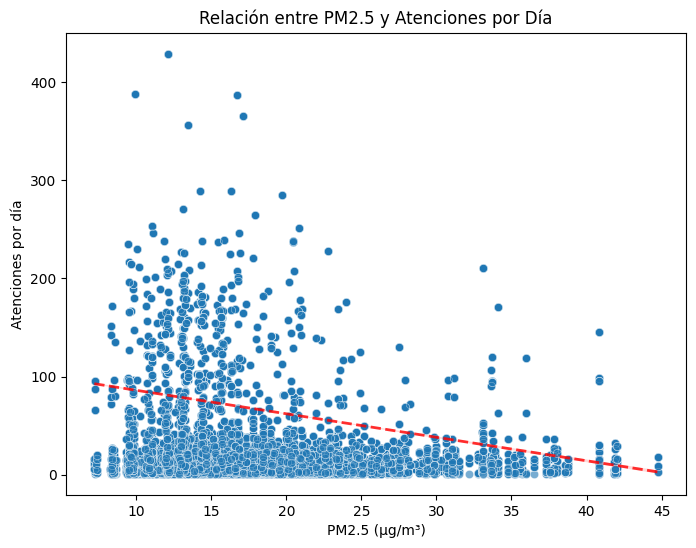

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=datasetEstudio_2021_2024['pm25'], y=datasetEstudio_2021_2024['atenciones_por_dia'], alpha=0.6)
sns.regplot(x=datasetEstudio_2021_2024['pm25'], y=datasetEstudio_2021_2024['atenciones_por_dia'], scatter=False,
            color="red",
            line_kws={"linestyle": "dashed", "linewidth": 2, "alpha": 0.8},
            label="Tendencia")

plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Atenciones por día')
plt.title('Relación entre PM2.5 y Atenciones por Día')
plt.show()


In [18]:
df = datasetEstudio_2021_2024_scale.copy()

df = df.sample(frac=0.3, random_state=42)  # Tomemos una fracción de los datos

# Normalizando los datos por medio de boxcox
for col in df.columns:
    if df[col].min() > 0:
        df[col], _ = boxcox(df[col] + 1e-6)

X = df.drop(columns=['atenciones_por_dia', 'edad', 'sector_ips', 'festivo', 'estacion', 'velocidad_max', 'mes', 'dia_semana'])  # Variables predictoras
y = df['atenciones_por_dia']  # Variable objetivo

fa = FactorAnalysis(n_components=4, random_state=42)
X_factors = fa.fit_transform(X)  # Transformamos los datos originales en factores

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.10259404959686133
MSE: 0.022465965898143724
R²: 0.36088261718719816


In [19]:
df = datasetEstudio_2021_2024_scale.copy()

df = df.sample(frac=0.3, random_state=42)  # Tomemos una fracción de los datos

# Normalizando los datos por medio de yeo-johnson
pt = PowerTransformer(method='yeo-johnson')  # Funciona con datos negativos
df_normalized = pt.fit_transform(df)
df = pd.DataFrame(df_normalized, columns=(df.columns))

X = df.drop(columns=['atenciones_por_dia', 'edad', 'sector_ips', 'festivo', 'estacion', 'velocidad_max', 'mes', 'dia_semana'])  # Variables predictoras
y = df['atenciones_por_dia']  # Variable objetivo

fa = FactorAnalysis(n_components=4, random_state=42)
X_factors = fa.fit_transform(X)  # Transformamos los datos originales en factores

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_factor_analysis.py:296: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


MAE: 0.5667412746734066
MSE: 0.5954857349615152
R²: 0.4014195147255062


In [20]:
df = datasetEstudio_2021_2024_scale.copy()

df = df.sample(frac=0.3, random_state=42)  # Tomemos una fracción de los datos

# Normalizando los datos por medio de log
df = np.log1p(df)  # log(1 + x), útil si hay ceros en los datos

X = df.drop(columns=['atenciones_por_dia', 'edad', 'sector_ips', 'festivo', 'estacion', 'velocidad_max', 'mes', 'dia_semana'])  # Variables predictoras
y = df['atenciones_por_dia']  # Variable objetivo

fa = FactorAnalysis(n_components=4, random_state=42)
X_factors = fa.fit_transform(X)  # Transformamos los datos originales en factores

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.08473487204429694
MSE: 0.013361803337929315
R²: 0.3798785754336337


In [21]:
# Esta tomando mucho tiempo el entrenamiento con todo el dataset, usemos
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

# Reducir el tamaño de la muestra en cada conjunto
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)
X_test_sample, _, y_test_sample, _ = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

# Entrenar el modelo SVM con la muestra
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_sample, y_train_sample)

# Evaluación del modelo
y_pred = svm_model.predict(X_test_sample)
mae = mean_absolute_error(y_test_sample, y_pred)
mse = mean_squared_error(y_test_sample, y_pred)
r2 = r2_score(y_test_sample, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 0.0863564265336895
MSE: 0.014206378948980122
R²: 0.35986001180673377
